<a href="https://colab.research.google.com/github/Varkenes/Tensorflow-Keras-Niebla/blob/main/90Train_10Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/90%20entrenamiento%20niebla.csv')

In [ ]:
print(df)

       N     T (°C)     HR (%)  ...        Vy  Nubosidad(%)  Flujo (L/día)
0     12  17.470833  49.156250  ...  0.086527             6           0.00
1      6  18.611458  50.416667  ... -0.087348             7           0.00
2     36  12.633333  74.333333  ...  0.061945            99           0.00
3    148   9.995238  78.976190  ...  0.011856             6           0.00
4    181  12.193939  88.606061  ...  0.160884           100           0.00
..   ...        ...        ...  ...       ...           ...            ...
185  192  13.934783  75.630435  ... -0.063762            23           0.00
186    8  14.697917  60.572917  ... -0.298029           100           0.00
187   66   8.740426  70.382979  ... -0.088198             6           0.00
188   69  10.889189  77.189189  ...  0.164574            73           0.06
189   85  10.537500  91.666667  ...  0.038525           100           0.00

[190 rows x 9 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[ 1.20000000e+01  1.74708333e+01  4.91562500e+01 ...  8.65271980e-02
   6.00000000e+00  0.00000000e+00]
 [ 6.00000000e+00  1.86114583e+01  5.04166667e+01 ... -8.73477370e-02
   7.00000000e+00  0.00000000e+00]
 [ 3.60000000e+01  1.26333333e+01  7.43333333e+01 ...  6.19447680e-02
   9.90000000e+01  0.00000000e+00]
 ...
 [ 6.60000000e+01  8.74042553e+00  7.03829787e+01 ... -8.81981630e-02
   6.00000000e+00  0.00000000e+00]
 [ 6.90000000e+01  1.08891892e+01  7.71891892e+01 ...  1.64574187e-01
   7.30000000e+01  6.00000000e-02]
 [ 8.50000000e+01  1.05375000e+01  9.16666667e+01 ...  3.85246200e-02
   1.00000000e+02  0.00000000e+00]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,1:8]
Y=dataset[:,8]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[ 1.74708333e+01  4.91562500e+01  1.01184375e+03 ... -5.85290697e-01
   8.65271980e-02  6.00000000e+00]
 [ 1.86114583e+01  5.04166667e+01  1.01187500e+03 ... -6.10434067e-01
  -8.73477370e-02  7.00000000e+00]
 [ 1.26333333e+01  7.43333333e+01  1.01415208e+03 ... -1.95765553e-01
   6.19447680e-02  9.90000000e+01]
 ...
 [ 8.74042553e+00  7.03829787e+01  1.01249167e+03 ... -3.55510207e-01
  -8.81981630e-02  6.00000000e+00]
 [ 1.08891892e+01  7.71891892e+01  1.02302917e+03 ... -3.15964517e-01
   1.64574187e-01  7.30000000e+01]
 [ 1.05375000e+01  9.16666667e+01  1.00587917e+03 ... -1.07945605e-01
   3.85246200e-02  1.00000000e+02]]


In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.74 0.   0.02 0.   0.33
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.   2.81 0.22
 0.   0.   1.91 0.12 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.97 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.18 0.   0.   0.04
 2.49 0.19 0.01 0.   0.   1.55 0.   0.   0.   0.   0.01 0.   0.01 0.
 0.   0.   0.   0.37 0.   0.08 0.   0.1  0.   0.   0.   0.   0.   0.
 0.   0.14 0.   0.   0.   0.   0.   0.   0.08 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.15 0.   0.   0.24 0.04 0.   0.
 0.   0.01 0.   0.   0.   0.   0.   1.55 0.14 0.01 0.   0.   0.17 0.
 0.   0.   0.06 0.   0.   0.14 0.   0.   0.01 0.   0.   0.   0.   0.02
 0.   0.   0.69 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   2.5  0.   0.   0.   0.02 2.17 0.   0.   0.   0.   0.01 0.   0.01
 0.   0.   0.   0.   0.   0.   0.06 0.  ]


# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=8,verbose=2)

Epoch 1/8
6/6 - 1s - loss: 1117.5750 - mae: 24.2331 - mse: 1117.5750
Epoch 2/8
6/6 - 0s - loss: 12.7458 - mae: 2.7232 - mse: 12.7458
Epoch 3/8
6/6 - 0s - loss: 39.5521 - mae: 4.8496 - mse: 39.5521
Epoch 4/8
6/6 - 0s - loss: 525.1640 - mae: 21.8356 - mse: 525.1640
Epoch 5/8
6/6 - 0s - loss: 30.2981 - mae: 4.7483 - mse: 30.2981
Epoch 6/8
6/6 - 0s - loss: 333.3800 - mae: 17.0901 - mse: 333.3800
Epoch 7/8
6/6 - 0s - loss: 143.7218 - mae: 11.2289 - mse: 143.7218
Epoch 8/8
6/6 - 0s - loss: 227.0080 - mae: 14.4356 - mse: 227.0080


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wypmpi91
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-wypmpi91
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c60db3aa06bcd8030c684949373997ef2f03cdf8_-py3-none-any.whl size=154243 sha256=b9586040ca741562f888ac30eb01e2e4bd678749830e1f15649c2c157b54831d
  Stored in directory: /tmp/pip-ephem-wheel-cache-rctij8uh/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 15000

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:232.2614,  mae:14.7744,  mse:232.2614,  
....................................................................................................
Epoch: 100, loss:27.6626,  mae:5.2366,  mse:27.6626,  
....................................................................................................
Epoch: 200, loss:6.0416,  mae:2.3596,  mse:6.0416,  
....................................................................................................
Epoch: 300, loss:2.8709,  mae:1.6366,  mse:2.8709,  
....................................................................................................
Epoch: 400, loss:0.7841,  mae:0.7882,  mse:0.7841,  
....................................................................................................
Epoch: 500, loss:0.2450,  mae:0.3390,  mse:0.2450,  
....................................................................................................
Epoch: 600, loss:0.4253,  mae:0.5068,  mse:0.4253,  
.................

## **Gráfica Valores Reales V/s Predicción**

0.8709494408495871

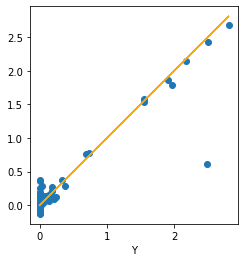

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict90.csv", prediction, delimiter=",")

[[ 5.60686439e-02]
 [ 4.91470546e-02]
 [ 7.62358904e-02]
 [ 2.58018970e-01]
 [ 3.83128971e-02]
 [ 1.70843080e-01]
 [ 5.58865517e-02]
 [ 4.67517525e-02]
 [-3.38462740e-02]
 [ 7.71052182e-01]
 [ 5.18695265e-02]
 [ 6.34725988e-02]
 [ 9.56501812e-02]
 [ 3.75075072e-01]
 [ 3.05537730e-02]
 [ 4.30905670e-02]
 [ 2.09122896e-02]
 [ 4.07001525e-02]
 [ 7.85842538e-03]
 [ 7.05790371e-02]
 [ 7.72883147e-02]
 [ 5.42411953e-02]
 [-1.04867652e-01]
 [ 2.84647703e-01]
 [ 6.60071522e-02]
 [ 6.93298131e-02]
 [ 2.68610191e+00]
 [ 9.64957923e-02]
 [ 4.67729419e-02]
 [ 1.42658159e-01]
 [ 1.86456728e+00]
 [ 9.83800143e-02]
 [ 9.21408981e-02]
 [ 2.90430635e-02]
 [ 3.18312198e-02]
 [ 4.25848216e-02]
 [ 5.38809747e-02]
 [ 3.14885825e-02]
 [ 8.00317079e-02]
 [ 7.01433271e-02]
 [ 2.72917897e-02]
 [ 5.70943058e-02]
 [ 4.94094342e-02]
 [ 6.81483001e-02]
 [-1.12168342e-02]
 [ 1.79111183e+00]
 [ 8.62964541e-02]
 [ 5.39802164e-02]
 [ 3.42618823e-02]
 [-1.29477546e-01]
 [ 6.80084080e-02]
 [ 3.32807750e-02]
 [ 5.4577112

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/10%20testeo%20niebla.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,1:8]
Ytest=dataset2[:,8]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.31538729438919705


-0.1439293252500209

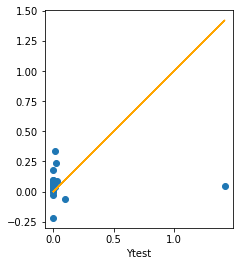

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict10.csv", predict, delimiter=",")

[[ 0.01549859]
 [ 0.06950289]
 [ 0.02144168]
 [ 0.04830633]
 [-0.21862502]
 [ 0.02378784]
 [ 0.09175476]
 [ 0.08930282]
 [ 0.09834065]
 [ 0.3374363 ]
 [-0.06068398]
 [ 0.18191172]
 [ 0.07014848]
 [-0.0043139 ]
 [ 0.0636798 ]
 [ 0.03614168]
 [ 0.2346458 ]
 [ 0.04845329]
 [ 0.05035551]
 [-0.0325876 ]
 [ 0.039342  ]
 [ 0.04888152]]
